This notebook aims to illustrate the importance and the influence of using moving averages. A moving average assigns each value the average of previous values and the value itself - for example the ten value moving average of x99 is the average of the values x90 to x99.

Let's take a look at the global annual mean temperature based on MPI model data for the period of 6000 BCE - 1850 CE:

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

temp = xr.open_dataset("/students_files/data/slo0043_echam6_code167_mm_1001_8850.ncslo0043_echam6_code167_mm_1001_8850.nc")
mean_temp = temp.mean(dim=['lat', 'lon'])
mean_temp -= 273.15

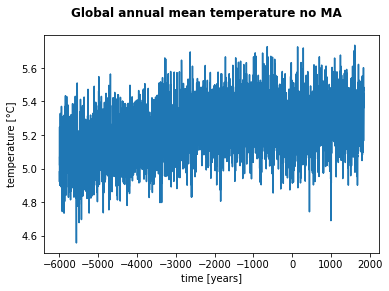

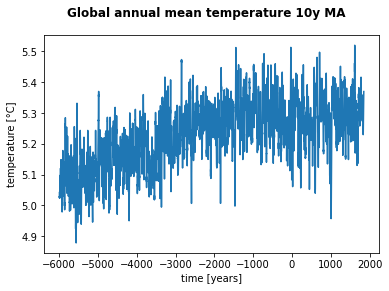

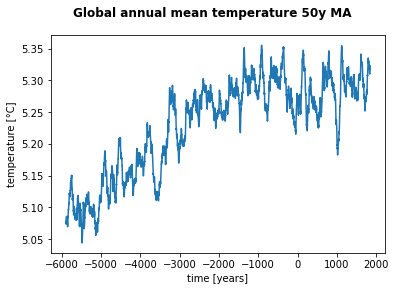

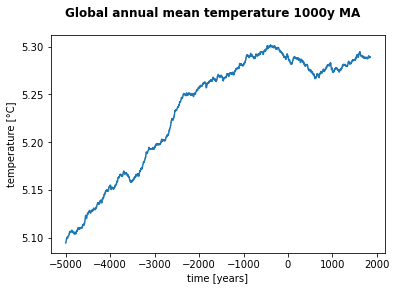

In [4]:
rolling_mean = mean_temp.rolling(time=12).mean().isel(time=slice(11, None, 12))
rolling_mean['time'] = xr.DataArray(range(-6000, rolling_mean.time.size-6000), dims='time')
rolling_mean1 = rolling_mean.rolling(time=1).mean()


plt.plot(rolling_mean1['time'], rolling_mean1['var167'])
plt.xlabel('time [years]')
plt.ylabel('temperature [°C]')
plt.suptitle('Global annual mean temperature no MA', fontweight='bold')
plt.show()


rolling_mean10 = rolling_mean.rolling(time=10).mean()
plt.plot(rolling_mean10['time'], rolling_mean10['var167'])
plt.xlabel('time [years]')
plt.ylabel('temperature [°C]')
plt.suptitle('Global annual mean temperature 10y MA', fontweight='bold')
plt.show()


rolling_mean100 = rolling_mean.rolling(time=100).mean()
plt.plot(rolling_mean100['time'], rolling_mean100['var167'])
plt.xlabel('time [years]')
plt.ylabel('temperature [°C]')
plt.suptitle('Global annual mean temperature 50y MA', fontweight='bold')
plt.show()


rolling_mean1000 = rolling_mean.rolling(time=1000).mean()
plt.plot(rolling_mean1000['time'], rolling_mean1000['var167'])
plt.xlabel('time [years]')
plt.ylabel('temperature [°C]')
plt.suptitle('Global annual mean temperature 1000y MA', fontweight='bold')
plt.show()

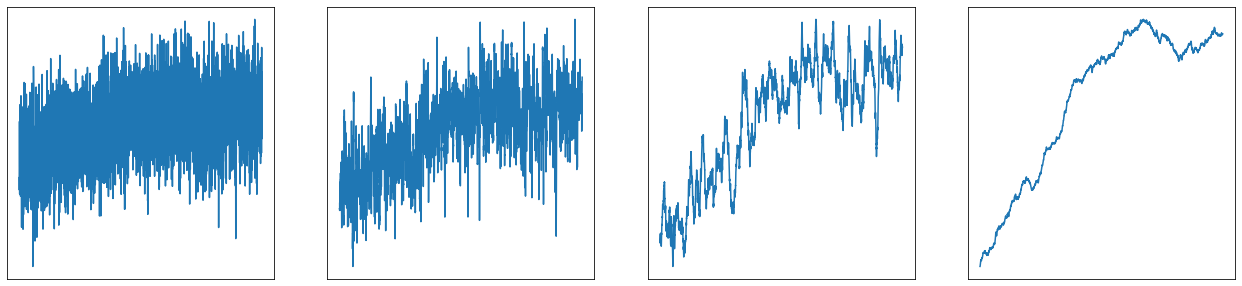

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(22,5))


axs[0].plot(rolling_mean1['time'], rolling_mean1['var167'])
axs[0].tick_params(axis='both', which='both', length=0)
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])
#axs[0].set_title('No MA')
#axs[0].set_xlabel('year')
#axs[0].set_ylabel('temperature [°C]')

axs[1].plot(rolling_mean10['time'], rolling_mean10['var167'])
axs[1].tick_params(axis='both', which='both', length=0)
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])
#axs[1].set_title('10 year MA')
#axs[1].set_xlabel('year')
#axs[1].set_ylabel('temperature [°C]')

axs[2].plot(rolling_mean100['time'], rolling_mean100['var167'])
axs[2].tick_params(axis='both', which='both', length=0)
axs[2].set_xticklabels([])
axs[2].set_yticklabels([])
#axs[2].set_title('100 year MA')
#axs[2].set_xlabel('year')
#axs[2].set_ylabel('temperature [°C]')

axs[3].plot(rolling_mean1000['time'], rolling_mean1000['var167'])
axs[3].tick_params(axis='both', which='both', length=0)
axs[3].set_xticklabels([])
axs[3].set_yticklabels([])
#axs[3].set_title('1000 year MA')
#axs[3].set_xlabel('year');
#axs[3].set_ylabel('temperature [°C]');

plt.savefig("/students_files/marti/plots/ma_illustration");